In [106]:
import pandas as pd
import random
import numpy as np
from random import random as rnd
from numpy.random import randint

In [107]:
def initialize_population(csv_file, n_population):
    # 
    # Generate random population for TSP based on user input.
    # Ensures the starting point is also the ending point and all indices are integers.
    
    # Parameters:
    # - csv_file: Path to the CSV file with city data (must include 'City', 'Latitude', 'Longitude').
    # - n_population: Number of random routes to generate.
    
    # Returns:
    # - A list of random routes with the user-selected starting and ending point as indices.
    #
    n_population=200
    # Load city data
    df = pd.read_csv(csv_file)

    # Map city names to indices
    POI = {city: idx for idx, city in enumerate(df['locations'])}

    # Display all cities and ask the user for input
    print("Available cities:")
    for idx, city in enumerate(df['locations'], start=1):
        print(f"{idx}. {city}")
    
    # Get starting point
    start_idx = int(input("Choose your starting point (enter the number): "))-1 
    start_city = df['locations'].iloc[start_idx]
    

    # Get cities to visit
    print("\nChoose the places you want to visit (enter numbers separated by commas):")
    visit_idxs = list(map(lambda x: int(x.strip())-1, input().split(',')))

    # Ensure starting point is included
    visit_cities = [df['locations'].iloc[i] for i in visit_idxs if i != start_idx]
    cities_to_visit = [start_city] + visit_cities

    # Generate random population
    population = []
    for _ in range(n_population):
        random_route = cities_to_visit[1:]  # Exclude the starting point for shuffling
        random.shuffle(random_route)  # Shuffle the intermediate cities
        random_route = [start_city] + random_route + [start_city]  # Add start and end
        population.append([POI[city] for city in random_route])  # Convert city names to indices
    
    return population


csv_file = "finaldata_1.csv"  
population = initialize_population(csv_file, n_population=100)

# Display the first few routes
print("\nGenerated Population (First 5 Routes):")
for route in population[:5]:
    print(route)

Available cities:
1. Pashupatinath Temple
2. Boudhanath (Stupa)
3. Swayambhunath Stupa
4. Kopan Monastery
5. Garden of Dreams
6. Kathmandu Durbar Square
7. Buddha Nilkanth
8. Narayanhiti Palace
9. Indra Chowk
10. Taudaha Lake
11. Kathesimbhu Stupa
12. Dakshinkali Temple
13. National Museum of Nepal
14. White Monastery
15. Royal Botanical Gardens
16. Basantapur Tower
17. Khawalung Monastery
18. Patan Durbar Square
19. Nagarkot
20. Chandragiri
21. Shivapuri Nagarjun National Park
22. Bhaktapur Durbar Square
23. Phulchoki
24. Kulekhani
25. Namo Buddha
26. Jump KTM
27. Art in Paradise Nepal
28. Whoopee Land
29. Kathmandu Fun Park
30. Outdoor Adventure Centre Nepal


Choose your starting point (enter the number):  30



Choose the places you want to visit (enter numbers separated by commas):


 17,18,19,20,21,22,23,24,25,26,27,28,29



Generated Population (First 5 Routes):
[29, 17, 20, 26, 19, 25, 18, 24, 16, 28, 27, 21, 23, 22, 29]
[29, 17, 20, 28, 25, 27, 18, 24, 23, 16, 21, 19, 22, 26, 29]
[29, 28, 21, 27, 25, 26, 23, 16, 24, 19, 22, 18, 17, 20, 29]
[29, 28, 22, 18, 25, 21, 16, 27, 19, 24, 23, 26, 20, 17, 29]
[29, 16, 26, 25, 28, 19, 18, 20, 27, 24, 22, 21, 17, 23, 29]


In [108]:
print("Initial Population")
for route in population[:]:
    
    print(route)

Initial Population
[29, 17, 20, 26, 19, 25, 18, 24, 16, 28, 27, 21, 23, 22, 29]
[29, 17, 20, 28, 25, 27, 18, 24, 23, 16, 21, 19, 22, 26, 29]
[29, 28, 21, 27, 25, 26, 23, 16, 24, 19, 22, 18, 17, 20, 29]
[29, 28, 22, 18, 25, 21, 16, 27, 19, 24, 23, 26, 20, 17, 29]
[29, 16, 26, 25, 28, 19, 18, 20, 27, 24, 22, 21, 17, 23, 29]
[29, 16, 20, 21, 28, 23, 27, 17, 24, 26, 25, 18, 22, 19, 29]
[29, 27, 26, 23, 20, 24, 21, 16, 19, 28, 18, 17, 25, 22, 29]
[29, 25, 17, 21, 19, 22, 26, 18, 23, 16, 20, 24, 28, 27, 29]
[29, 26, 20, 25, 21, 18, 22, 24, 19, 16, 17, 27, 28, 23, 29]
[29, 22, 19, 25, 17, 27, 18, 28, 26, 20, 23, 24, 21, 16, 29]
[29, 18, 23, 17, 16, 28, 24, 26, 27, 22, 20, 19, 21, 25, 29]
[29, 24, 16, 25, 18, 19, 28, 21, 26, 27, 17, 20, 23, 22, 29]
[29, 25, 24, 22, 19, 16, 28, 26, 20, 18, 17, 23, 21, 27, 29]
[29, 28, 18, 17, 25, 20, 16, 26, 19, 23, 22, 24, 21, 27, 29]
[29, 22, 28, 17, 21, 25, 16, 19, 24, 20, 23, 26, 27, 18, 29]
[29, 16, 19, 25, 28, 21, 20, 27, 23, 24, 26, 22, 17, 18, 29]
[29, 

In [109]:
def fitness_prob(population, distance_matrix):
  
    # Calculate total distance for each individual (chromosome)
    total_dist_all_individuals = [total_dist_individual(chromosome, distance_matrix) for chromosome in population]
    
    # Compute multiplicative inverse of the distances
    fitness_probs = [1 / dist if dist != 0 else float('inf') for dist in total_dist_all_individuals]
    
    return fitness_probs

def total_dist_individual(chromosome, distance_matrix):
    # Calculate the total distance for a single chromosome.
    total_distance = 0
    for i in range(len(chromosome) - 1):
        total_distance += distance_matrix[chromosome[i]][chromosome[i + 1]]
    
    total_distance += distance_matrix[chromosome[-1]][chromosome[0]]
    return total_distance


In [110]:
import pandas as pd
import random

def load_distance_matrix(file_path):
    #  Load the distance matrix from a CSV file and return as a numpy array. 
    distance_matrix = pd.read_csv(file_path, index_col=0)
    return distance_matrix.values  # Return as numpy array


In [111]:
for route in population[:]:
    print(route)
    

[29, 17, 20, 26, 19, 25, 18, 24, 16, 28, 27, 21, 23, 22, 29]
[29, 17, 20, 28, 25, 27, 18, 24, 23, 16, 21, 19, 22, 26, 29]
[29, 28, 21, 27, 25, 26, 23, 16, 24, 19, 22, 18, 17, 20, 29]
[29, 28, 22, 18, 25, 21, 16, 27, 19, 24, 23, 26, 20, 17, 29]
[29, 16, 26, 25, 28, 19, 18, 20, 27, 24, 22, 21, 17, 23, 29]
[29, 16, 20, 21, 28, 23, 27, 17, 24, 26, 25, 18, 22, 19, 29]
[29, 27, 26, 23, 20, 24, 21, 16, 19, 28, 18, 17, 25, 22, 29]
[29, 25, 17, 21, 19, 22, 26, 18, 23, 16, 20, 24, 28, 27, 29]
[29, 26, 20, 25, 21, 18, 22, 24, 19, 16, 17, 27, 28, 23, 29]
[29, 22, 19, 25, 17, 27, 18, 28, 26, 20, 23, 24, 21, 16, 29]
[29, 18, 23, 17, 16, 28, 24, 26, 27, 22, 20, 19, 21, 25, 29]
[29, 24, 16, 25, 18, 19, 28, 21, 26, 27, 17, 20, 23, 22, 29]
[29, 25, 24, 22, 19, 16, 28, 26, 20, 18, 17, 23, 21, 27, 29]
[29, 28, 18, 17, 25, 20, 16, 26, 19, 23, 22, 24, 21, 27, 29]
[29, 22, 28, 17, 21, 25, 16, 19, 24, 20, 23, 26, 27, 18, 29]
[29, 16, 19, 25, 28, 21, 20, 27, 23, 24, 26, 22, 17, 18, 29]
[29, 23, 25, 27, 17, 21,

In [112]:
def Roulette_wheel_selection(fitness_score):
    Pc = [] #probability of selecting a chromosome
    sum_of_fitness = np.sum(fitness_score)
    for i in fitness_score:
        Pc.append(i/sum_of_fitness)
#     print(Pc)
    # print("Pc",Pc)
    return Pc

In [113]:
path_fitness_pair = {} #for global access
def dict_pair(population, fitness_score):
    for i in range(len(population)):
        path_fitness_pair[i] = fitness_score[i]
    return path_fitness_pair

In [114]:
def rank_selected(selected_population):#fitness score of selected population
    key = []
    for i in selected_population:
        index = population.index(i)
        key.append(index)
    #fittest pairing => pairing the selected parents
    #sorting dict by value
    mylist = [path_fitness_pair[i] for i in key] #fitness score of selected parents
    # print(mylist)
    mylist.sort()#ascending order
    # print(mylist)
    mylist = mylist[::-1] # reverse ordering list , descending order
    # print(mylist)
    path_index = [list(path_fitness_pair.values()).index(i) for i in mylist]
    return path_index

In [115]:
#Partially Mapped Crossover
def PMX(offspring1, offspring2, temp1, pivot_point1, pivot_point2):
    for i in range(len(offspring1)):
        if i < pivot_point1 or i >= pivot_point2: #change the points here
#             print('index',i)
            if temp1[i] not in offspring1:
                offspring1[i] = temp1[i]
#                 print(offspring1[i])
            else:
#                 print(temp1[i] in offspring1[2:4])
                while temp1[i] in offspring1[pivot_point1:pivot_point2]:
                    index = offspring1.index(temp1[i])
                    temp1[i] = offspring2[index]
                offspring1[i] = temp1[i]
#                 print(offspring1[i])

In [116]:
def selection(self, fitness_score):
        selected = []
       
        # calculating how many chromosomes to select for crossingover
        total_offspring = len( self.population) * self.crossover_rate
        num_parent_pairs = round(total_offspring / 2)
        num_selection = num_parent_pairs + 1
        
        for x in range(0, num_selection): 
            pointer = rnd()
            prob = 0
#             print(pointer)
            
            path_fitness_pair = dict_pair(self.population, fitness_score)
            for index, i in enumerate(Roulette_wheel_selection(fitness_score)):#roulette wheel
                prob += i #can take out cumulative sum instead see this............
                if prob > pointer:
#                     print(index)
                    selected.append(self.population[index])
#                     print('fitness_score',path_fitness_pair[index])
                    break
#             print(selected)
        return selected 

In [117]:
class GA:
    def __init__(self, population, crossover_rate):
        self.population = population
       
        self.crossover_rate = crossover_rate

     # Function to load the distance matrix from a file
    def load_distance_matrix(self, file_path):
        """
        Load the distance matrix from a file.
        """
        
        return np.load(file_path)


    def total_dist_individual(self,distance_matrix, chromosome):
        total_distance = 0
        for i in range(len(chromosome) - 1):
            total_distance += distance_matrix[chromosome[i]][chromosome[i + 1]]
        return total_distance

    def fitness_prob(self, distance_matrix):
        total_dist_all_individuals = [total_dist_individual(chromosome,distance_matrix) for chromosome in population]
    
        # Compute multiplicative inverse of the distances
        fitness_probs = [1 / dist if dist != 0 else float('inf') for dist in total_dist_all_individuals]
        
        return fitness_probs

    def best_solution(self,fitness_score):
        best_fittest = np.max(fitness_score)
        index = fitness_score.index(best_fittest)
        best_individual = self.population[index]
        return best_fittest, best_individual

   

    def selection(self,fitness_prob):
        selected = []
        # calculating how many chromosomes to select for crossingover
        total_offspring = len(self.population) * self.crossover_rate
        num_parent_pairs = round(total_offspring / 2)
        num_selection = num_parent_pairs + 1
        
        for x in range(0, num_selection): 
            pointer = rnd()
            prob = 0
#             print(pointer)
            path_fitness_pair = dict_pair(self.population, fitness_prob)
            for index, i in enumerate(Roulette_wheel_selection(fitness_prob)):#roulette wheel
                prob += i #can take out cumulative sum instead see this............
                if prob > pointer:
#                     print(index)
                    selected.append(self.population[index])
#                     print('fitness_score',path_fitness_pair[index])
                    break
#             print(selected)
        return selected 

    def rank_selected(self,selected_population):#fitness score of selected population
        key = []
        for i in selected_population:
            index = self.population.index(i)
            key.append(index)
        #fittest pairing => pairing the selected parents
        #sorting dict by value
        mylist = [path_fitness_pair[i] for i in key] #fitness score of selected parents
        # print(mylist)
        mylist.sort()#ascending order
        # print(mylist)
        mylist = mylist[::-1] # reverse ordering list , descending order
        # print(mylist)
        path_index = [list(path_fitness_pair.values()).index(i) for i in mylist]
        return path_index

    def pairing(self,selected):
        parents = [[selected[x],selected[x+1]] for x in range(len(selected)-1)]
        return parents

    def two_point_crossover(self,parent1, parent2):
        pivot_point1 = randint(1, len(parent1)-2)
        # print('pivot', pivot_point1)
        pivot_point2 = randint(1, len(parent1)-1)
        while(pivot_point2 <= pivot_point1):
            pivot_point2 = randint(1, len(parent1))
        # print(pivot_point1, pivot_point2)
    #     print(parent1, parent2)
        if random.random() < 0.6: 

            offspring1 = [-1]*len(parent1)
            offspring2 = [-1]*len(parent1)
            offspring1[pivot_point1:pivot_point2] = parent2[pivot_point1:pivot_point2]
            offspring2[pivot_point1:pivot_point2] = parent1[pivot_point1:pivot_point2]

            # print(parent1, parent2)
            temp1 = parent1.copy()
            temp2 = parent2.copy() #copy garena bhane parent ma ni modification aauxa but why???

        #     print(offspring1)
            PMX(offspring1, offspring2, temp1, pivot_point1, pivot_point2)
            PMX(offspring2, offspring1, temp2, pivot_point1, pivot_point2)
            # print(f"offspring1:{offspring1},offspring2:{offspring2}")

            return [offspring1, offspring2]
        
        else:
            return [parent1, parent2]
    #     return offspring1, offspring2 =>list of tuples of list
    #     print(parent1, parent2)

    def individual_for_mutation(self, mutation_rate=0.2):
        """
        Select individuals for mutation based on mutation rate.
        """
        num_to_mutate = max(1, round(len(self.population) * mutation_rate))  # Ensure at least 1 individual
        individual_to_mutate = random.sample(self.population, num_to_mutate)  # Unique selection
        
        return individual_to_mutate



    def scramble_mutation(self,individual):
        p1 = randint(1, len(individual)-2)
        p2 = randint(1, len(individual)-1)
        while p1 >= p2:
            p2 = randint(1, len(individual))
        c2 = individual[p1:p2]
        random.shuffle(c2)
        for i in c2:
            individual[p1] = i
            p1 +=1
        return individual


In [118]:
def run(population):
    g = GA(population, crossover_rate=0.6)

    
    # Load the distance matrix
    distance_matrix_path = "C:\\Users\\gcpra\\practice_project\\distance_matrix.npy"
    distance_matrix = np.load(distance_matrix_path)
    

    # Compute fitness scores for the entire population
    fitness_scores = g.fitness_prob(distance_matrix)

    # Find the best individual and fitness score
    best_fittest, best_individual = g.best_solution(fitness_scores)

    # Perform elitism: Retain the best individual(s) without modification
    elite_population = [best_individual]

    # Selection process using sorted fitness scores
    selected = g.selection(fitness_scores)

    # Pair selected individuals for crossover
    paired_parents = g.pairing(selected)
    
    # Perform crossover to generate offspring
    offsprings = []
    for pair in paired_parents:
        offsprings.extend(g.two_point_crossover(pair[0], pair[1]))

    # Prepare the next generation population
    next_population = list(offsprings)

    # Perform mutations
    individuals_to_mutate = g.individual_for_mutation()
    for individual in individuals_to_mutate:
        mutated_individual = g.scramble_mutation(individual)
        next_population.append(mutated_individual)

    # Sort population based on fitness scores
    population_with_fitness = list(zip(population, fitness_scores))
    sorted_population_with_fitness = sorted(population_with_fitness, key=lambda x: x[1], reverse=True)

    # Select additional elite individuals beyond the best one
    additional_elite_count = min(10, len(sorted_population_with_fitness))  
    additional_elite = [ind for ind, _ in sorted_population_with_fitness[:additional_elite_count]]

    # Add additional elite individuals to the elite population
    elite_population.extend(additional_elite)

    # Add elite population to the next generation
    next_population.extend(elite_population)

    # Ensure population size remains constant
    while len(next_population) < len(population):
        next_population.append(random.choice(population))

    return best_fittest, best_individual, next_population


In [119]:
run(population)

(np.float64(0.011839724073868357),
 [29, 24, 25, 27, 28, 18, 22, 16, 19, 20, 21, 17, 23, 26, 29],
 [[29, 20, 26, 16, 17, 18, 23, 28, 19, 25, 21, 27, 22, 24, 29],
  [29, 16, 19, 23, 25, 18, 24, 27, 17, 26, 21, 20, 22, 28, 29],
  [29, 16, 19, 23, 17, 27, 28, 18, 22, 26, 21, 20, 25, 24, 29],
  [29, 20, 22, 26, 23, 28, 24, 27, 25, 18, 21, 19, 16, 17, 29],
  [29, 20, 25, 26, 23, 24, 16, 18, 22, 27, 17, 19, 28, 21, 29],
  [29, 23, 25, 26, 24, 22, 28, 21, 20, 19, 27, 18, 16, 17, 29],
  [29, 23, 25, 26, 24, 22, 16, 27, 20, 19, 17, 18, 28, 21, 29],
  [29, 18, 28, 19, 21, 24, 22, 17, 23, 20, 27, 16, 26, 25, 29],
  [29, 18, 28, 19, 21, 16, 22, 27, 23, 20, 17, 24, 26, 25, 29],
  [29, 21, 18, 27, 16, 24, 23, 28, 25, 17, 19, 26, 22, 20, 29],
  [29, 21, 18, 27, 24, 16, 26, 28, 25, 17, 19, 23, 22, 20, 29],
  [29, 28, 20, 18, 22, 23, 27, 24, 21, 17, 16, 26, 25, 19, 29],
  [29, 28, 20, 18, 22, 26, 27, 24, 21, 16, 17, 23, 25, 19, 29],
  [29, 16, 19, 25, 28, 21, 20, 27, 23, 24, 26, 22, 17, 18, 29],
  [29,

In [120]:
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('finaldata_1.csv')

# Check the content of the locations column
print(df['locations'])



0                 Pashupatinath Temple
1                   Boudhanath (Stupa)
2                  Swayambhunath Stupa
3                      Kopan Monastery
4                     Garden of Dreams
5              Kathmandu Durbar Square
6                      Buddha Nilkanth
7                   Narayanhiti Palace
8                          Indra Chowk
9                         Taudaha Lake
10                   Kathesimbhu Stupa
11                  Dakshinkali Temple
12            National Museum of Nepal
13                     White Monastery
14             Royal Botanical Gardens
15                    Basantapur Tower
16                 Khawalung Monastery
17                 Patan Durbar Square
18                            Nagarkot
19                         Chandragiri
20    Shivapuri Nagarjun National Park
21             Bhaktapur Durbar Square
22                           Phulchoki
23                           Kulekhani
24                         Namo Buddha
25                       

Generation 1: Best Fittest: 0.011839724073868357, Best Individual: [29, 24, 25, 27, 28, 18, 22, 16, 19, 20, 21, 17, 23, 26, 29]
Generation 2: Best Fittest: 0.01233293154929868, Best Individual: [29, 26, 23, 20, 28, 24, 25, 27, 19, 21, 22, 18, 16, 17, 29]
Generation 3: Best Fittest: 0.013108973911883629, Best Individual: [29, 19, 24, 22, 18, 16, 25, 17, 23, 20, 21, 28, 27, 26, 29]
Generation 4: Best Fittest: 0.013108973911883629, Best Individual: [29, 19, 24, 22, 18, 16, 25, 17, 23, 20, 21, 28, 27, 26, 29]
Generation 5: Best Fittest: 0.013108973911883629, Best Individual: [29, 19, 24, 22, 18, 25, 23, 21, 20, 17, 16, 28, 27, 26, 29]
Generation 6: Best Fittest: 0.012909834966539085, Best Individual: [29, 19, 17, 22, 18, 16, 26, 24, 23, 20, 21, 28, 27, 25, 29]
Generation 7: Best Fittest: 0.012909834966539085, Best Individual: [29, 19, 17, 22, 18, 16, 26, 24, 21, 23, 28, 20, 27, 25, 29]
Generation 8: Best Fittest: 0.01291652330635074, Best Individual: [29, 25, 24, 17, 26, 28, 23, 21, 20, 22

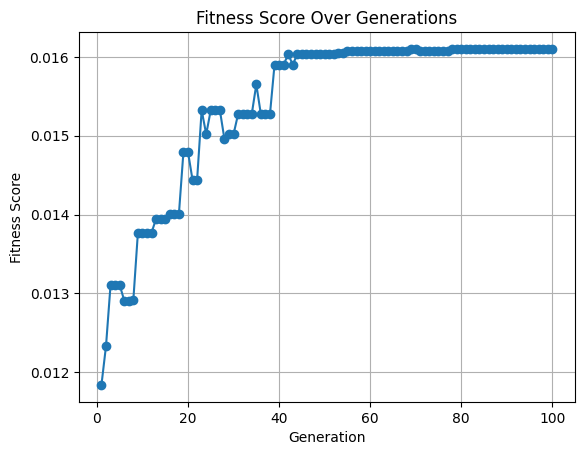

In [121]:
import matplotlib.pyplot as plt

POI = {city: idx for idx, city in enumerate(df['locations'])}
# Parameters
generation = 100
n_population = 200
fitness_scores = []  # Store fitness scores

# Run the Genetic Algorithm
for i in range(generation):
    best_fittest, best_individual, next_population = run(population)
    fitness_scores.append(best_fittest)  # Store fitness score
    
    print(f"Generation {i + 1}: Best Fittest: {best_fittest}, Best Individual: {best_individual}")
    
    # Ensure next_population size matches population_size
    while len(next_population) < n_population:
        next_population.append(population[randint(0, len(population) - 1)])
    
    population = next_population

# Extract the best route from the final best individual
route = [city for idx in best_individual for city, index in POI.items() if index == idx]

# Output the results
print("Best Route:", route)
print("Shortest Distance (Fitness Score):", best_fittest)

# Plot the fitness score graph
plt.plot(range(1, generation + 1), fitness_scores, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.title('Fitness Score Over Generations')
plt.grid()
plt.show()
